### 변수선택
* 중요도분석
* correlation matrix

In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '../')

from config.global_params import variable_info

In [2]:
print (variable_info.keys())
print (len(variable_info.keys()))

dict_keys(['NDNSW_surface', 'NCPCP_surface', 'SNOL_surface', 'UGRD_10maboveground', 'VGRD_10maboveground', 'TMP_1_5maboveground', 'TMIN_1_5maboveground', 'TMAX_1_5maboveground', 'SPFH_1_5maboveground', 'RH_1_5maboveground', 'VIS_1_5maboveground', 'DPT_1_5maboveground', 'MAXGUST_0maboveground', 'LCDC_entireatmosphere_consideredasasinglelayer_', 'MCDC_entireatmosphere_consideredasasinglelayer_', 'HCDC_entireatmosphere_consideredasasinglelayer_', 'TCAR_entireatmosphere_consideredasasinglelayer_', 'PRMSL_meansealevel', 'TMP_surface', 'PRES_surface'])
20


(868, 49, 20)
(868, 49, 2)
(42532, 20)
(42532, 2)


TypeError: xlabel() missing 1 required positional argument: 'xlabel'

<Figure size 2000x3000 with 0 Axes>

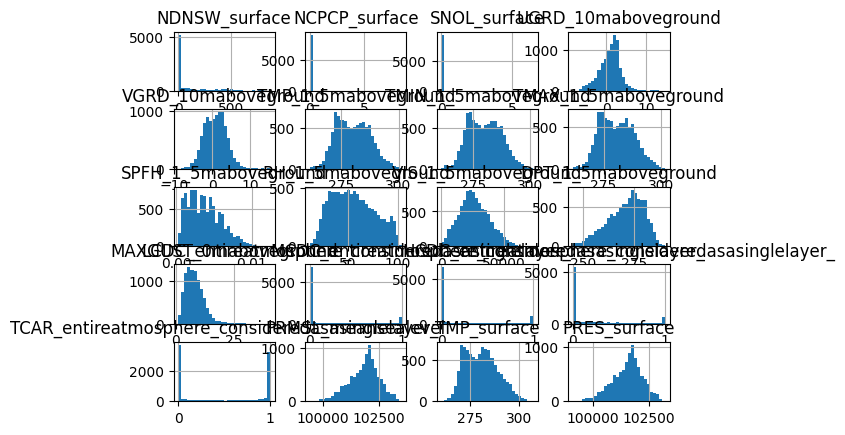

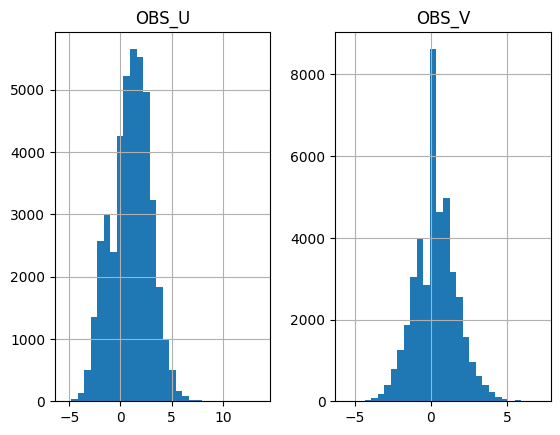

In [9]:
import matplotlib.pyplot as plt

nwp_file = "../DAIO/nwp_data_47105"
obs_file = "../DAIO/obs_data_47105"
nwp_data = np.load(nwp_file)
obs_data = np.load(obs_file)
print(nwp_data.shape)
print(obs_data.shape)

plot_nwp = pd.DataFrame(data=np.reshape(nwp_data, (-1,20)), columns=variable_info.keys())
plot_obs = pd.DataFrame(data=np.reshape(obs_data, (-1,2)), columns=['OBS_U', 'OBS_V'])

print(plot_nwp.shape)
print(plot_obs.shape)

plt.figure(figsize=(20, 30))
plot_nwp.hist(bins=30)
plot_obs.hist(bins=30)
#plt.xlabel(fontsize=14)
#plt.ylabel(fontsize=14)
plt.show()

In [ ]:
# 결측제거
plot_nwp

In [11]:
# 각 요소별 스케일링
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

model_ran = RandomForestRegressor()
#model_xgb = XGBRegressor()

model_ran.fit(plot_nwp, plot_obs[:,0])
##model_xgb.fit(x_tr, y_tr)

InvalidIndexError: (slice(None, None, None), 0)